<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Neural Networks: Keras and Tensorflow
</p>
</div>

DS-NTL-010824<p>Phase 4</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

In [1]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits, load_sample_images

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns


#### Neural Networks: Packages

When manually implementing:

- have to keep track of forward and backwards propagation for each layer:
    - equations and updates depends on specific layer activations
- manage caching updates to gradients and weights/activations appropriately

**Deep Learning frameworks take care of this for us**

In addition:

- efficient matrix math for speedup.
- use variants of gradient descent that are **much** faster/better.

Major frameworks:

<img src = "Images/kerastf.png" >
<center> Keras: high level API of Tensorflow. </center>

- Keras: apt for quickly building/trying neural network architectures with standard layers/optimizers. Still build complex networks.
- Tensorflow: for building more customized networks and more control of optimization.

<center><img src = "Images/pytorch.png" >
More customizable than Keras. More pythonic than base Tensorflow. Nice functionalities for NLP. </center>


We will use Keras.

In [2]:
from tensorflow import keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Images/skipconnection.png" ></center>

Skip connections, branching, etc.


#### The Sequential API

Take in a simple and sufficiently interesting dataset:

- demonstrate non-trivial decision boundary
- show sequential API at work

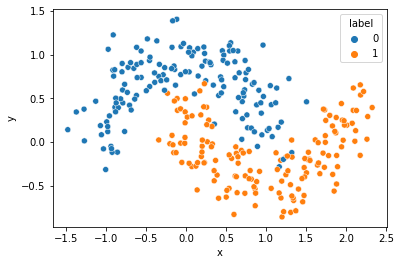

In [3]:
# generate two moons dataset
import seaborn as sns
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=10)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

sns.scatterplot(x = 'x', y = 'y', hue = 'label', data = df )
plt.show()

Import Sequential object: use Sequential API to construct models

In [4]:
from tensorflow.keras.models import Sequential

We want to start defining layers in the model:
    
The most common layer type in neural networks: 
- the **densely** connected layer

<img src = "Images/dense_layer.png" >

In [5]:
# creates densely connected layer object
from tensorflow.keras.layers import Dense

# defines input layer, not necessary in sequential API
# but nice for visualizing network later
from tensorflow.keras.layers import Input 

The Dense object constructor's basic arguments:
- units: number of nodes in layer
- activation: 'relu', 'tanh', 'sigmoid', 'softmax'


Defining the model: a shallow neural network

In [6]:
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu')) # one hidden layer, FIRST LAYER
model.add(Dense(units=1, activation='sigmoid')) #Output layer, sigmoid tells you binary classification, and same with units=1
#We have no input layer.

Building/compiling the model:

- define objective function and optimizer
- define metric to evaluate train/validation
- build the network connections, weight matrices, initializes, etc.

In [7]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])
#Has to be binary_crossentropy for binary classification
#There are many differenty types of optimizers, adam generally does well.

Some other loss functions:
- multiclass: 'categorical_crossentropy'
- regression: 'mean_squared_error'
- regression: 'mean_absolute_error'

The optimizer:

- Adam Optimizer: 
    - smoothens learning process 
    - uses adaptive learning rate.

A pretty good optimizer. Many other optimizers (NAdam, Adadelta).

#### Optimizers have hyperparameters.

- Can help in training speed up / finding minimum

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy', 'AUC'])

In [8]:
from tensorflow.keras.optimizers import Adam

In [9]:
opt = Adam(learning_rate = 0.01) # typical parameter

In [10]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', 'AUC'])
#This is where we define the metrics.

Metrics: takes in list (calculates metrics in list at each epoch):

Regression:
- 'mae'
- 'mse'
- 'rmse'

Classification:
- 'accuracy'
- 'AUC'
- 'fmeasure'
etc.

Keras provides metrics callable as objects:
- more metrics available
- pass in arguments (probability threshold, etc.)
- build your own metrics.

See documentation for more information.

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                150       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


Train test split the data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

#### .fit() method

- batch_size = # of points you train on in given forward/back-prop loop

typical batch sizes: 1, 32, 64, 128, 256, 512

Batch size:

- Stochastic Gradient Descent: batch_size = 1
- Minibatch Gradient Descent: batch_size = $n_{batch} < N_{train}$
- Batch Gradient Descent: full training set fed in on each forward/back-prop loop

The intuition behind SGD, mini-batch:

SGD: single point $i$
$$ \textbf{w}_{k+1} = \textbf{w}_k - \alpha \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Using a single point may not be good enough to sample loss function and its gradient. Noisy descent. 
- Can go wrong direction.
- Effectively looping one point at a time. Computationally inefficient.

Mini-batch gives you average of gradient over a sample of the training set: often good enough!

$$ \textbf{w}_{k+1} = \textbf{w}_k - \frac{\alpha}{n_{batch}} \sum_{i=1}^{n_{batch}} \nabla_{\textbf{w}}L(y_i, \hat{y}_i) $$

- Substantially smaller amount of data fed through: still make progress.

Batch gradient descent: all training data.
    
- Will always lower objective on training.
- But depending on dataset:
- manipulating huge matrices just to make one gradient descent step.

<img src = "Images/gradient_descent.png" >

#### Epochs
- Number of times to cycle through **entire** training data.
- Implies number of forward/backprop cycles is: $$ \frac{N_{train}}{n_{batch}} \times \text{epochs} $$

Can train through all epochs defined or:

**Earlystopping callback on training**

- Monitor training loss and set improvement threshold (min_delta)
- Waiting certain number of epochs if no improvements (patience)
- Terminate training

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
trainCallback = EarlyStopping(monitor='loss', min_delta = 1e-6, patience = 5) 
#If i do not see a change of 1e-6 in the next 5 epoches, STOP

**Validation set**

- can feed an external validation set 
- hold out a fraction of training set for validation
- evaluates on train and validation at each epoch

In [14]:
history = model.fit(X_train, y_train, epochs = 10000, batch_size = 32, validation_split = 0.2, callbacks=[trainCallback])
#Saving this as a object allows us to view the results as a dataframe

Epoch 1/10000
6/6 [==============================] - 0s 32ms/step - loss: 0.7600 - accuracy: 0.2500 - auc: 0.1195 - val_loss: 0.7511 - val_accuracy: 0.1875 - val_auc: 0.1277
Epoch 2/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.7340 - accuracy: 0.2812 - auc: 0.1446 - val_loss: 0.7258 - val_accuracy: 0.1667 - val_auc: 0.1804
Epoch 3/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.3802 - auc: 0.2804 - val_loss: 0.7023 - val_accuracy: 0.4583 - val_auc: 0.3902
Epoch 4/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6979 - auc: 0.6906 - val_loss: 0.6802 - val_accuracy: 0.6458 - val_auc: 0.8357
Epoch 5/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.8229 - auc: 0.9060 - val_loss: 0.6587 - val_accuracy: 0.7500 - val_auc: 0.9223
Epoch 6/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.6405 - accuracy: 0.8229 - auc: 0.9206 - val_loss: 0.6388 - 

6/6 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.8698 - auc: 0.9447 - val_loss: 0.3487 - val_accuracy: 0.8125 - val_auc: 0.9491
Epoch 49/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8698 - auc: 0.9452 - val_loss: 0.3463 - val_accuracy: 0.8125 - val_auc: 0.9500
Epoch 50/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8698 - auc: 0.9459 - val_loss: 0.3437 - val_accuracy: 0.8125 - val_auc: 0.9500
Epoch 51/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.3187 - accuracy: 0.8698 - auc: 0.9459 - val_loss: 0.3412 - val_accuracy: 0.8125 - val_auc: 0.9509
Epoch 52/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.3171 - accuracy: 0.8698 - auc: 0.9461 - val_loss: 0.3392 - val_accuracy: 0.8125 - val_auc: 0.9518
Epoch 53/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8698 - auc: 0.9461 - val_loss: 0.3363 - val_accura

6/6 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.8802 - auc: 0.9535 - val_loss: 0.2851 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 96/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2886 - accuracy: 0.8802 - auc: 0.9534 - val_loss: 0.2847 - val_accuracy: 0.8750 - val_auc: 0.9714
Epoch 97/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2882 - accuracy: 0.8802 - auc: 0.9539 - val_loss: 0.2830 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 98/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8802 - auc: 0.9538 - val_loss: 0.2827 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 99/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8802 - auc: 0.9540 - val_loss: 0.2819 - val_accuracy: 0.8750 - val_auc: 0.9705
Epoch 100/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8802 - auc: 0.9540 - val_loss: 0.2808 - val_accur

Epoch 142/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8750 - auc: 0.9567 - val_loss: 0.2568 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 143/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2749 - accuracy: 0.8750 - auc: 0.9569 - val_loss: 0.2576 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 144/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8750 - auc: 0.9570 - val_loss: 0.2573 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 145/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8750 - auc: 0.9569 - val_loss: 0.2561 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 146/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8750 - auc: 0.9570 - val_loss: 0.2558 - val_accuracy: 0.8750 - val_auc: 0.9786
Epoch 147/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2738 - accuracy: 0.8750 - auc: 0.9570 - val_loss

Epoch 189/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2616 - accuracy: 0.8802 - auc: 0.9604 - val_loss: 0.2389 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 190/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8802 - auc: 0.9608 - val_loss: 0.2382 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 191/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2609 - accuracy: 0.8802 - auc: 0.9607 - val_loss: 0.2381 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 192/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2606 - accuracy: 0.8802 - auc: 0.9608 - val_loss: 0.2383 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 193/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2603 - accuracy: 0.8802 - auc: 0.9610 - val_loss: 0.2374 - val_accuracy: 0.8958 - val_auc: 0.9804
Epoch 194/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2601 - accuracy: 0.8802 - auc: 0.9609 - val_loss

Epoch 236/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2427 - accuracy: 0.8854 - auc: 0.9675 - val_loss: 0.2168 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 237/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2419 - accuracy: 0.8854 - auc: 0.9674 - val_loss: 0.2160 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 238/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.8854 - auc: 0.9676 - val_loss: 0.2146 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 239/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2406 - accuracy: 0.8854 - auc: 0.9676 - val_loss: 0.2133 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 240/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2398 - accuracy: 0.8854 - auc: 0.9678 - val_loss: 0.2129 - val_accuracy: 0.9167 - val_auc: 0.9839
Epoch 241/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2394 - accuracy: 0.8854 - auc: 0.9679 - val_loss

Epoch 283/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2119 - accuracy: 0.8906 - auc: 0.9753 - val_loss: 0.1872 - val_accuracy: 0.9167 - val_auc: 0.9857
Epoch 284/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2112 - accuracy: 0.8906 - auc: 0.9753 - val_loss: 0.1864 - val_accuracy: 0.9375 - val_auc: 0.9866
Epoch 285/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2109 - accuracy: 0.8906 - auc: 0.9755 - val_loss: 0.1864 - val_accuracy: 0.9167 - val_auc: 0.9866
Epoch 286/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2102 - accuracy: 0.8906 - auc: 0.9755 - val_loss: 0.1851 - val_accuracy: 0.9583 - val_auc: 0.9866
Epoch 287/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2096 - accuracy: 0.8906 - auc: 0.9757 - val_loss: 0.1847 - val_accuracy: 0.9583 - val_auc: 0.9875
Epoch 288/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.2090 - accuracy: 0.8906 - auc: 0.9759 - val_loss

Epoch 330/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1852 - accuracy: 0.9115 - auc: 0.9823 - val_loss: 0.1646 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 331/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1847 - accuracy: 0.9167 - auc: 0.9824 - val_loss: 0.1646 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 332/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9167 - auc: 0.9826 - val_loss: 0.1643 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 333/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.9167 - auc: 0.9827 - val_loss: 0.1629 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 334/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9167 - auc: 0.9831 - val_loss: 0.1623 - val_accuracy: 0.9792 - val_auc: 0.9929
Epoch 335/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9167 - auc: 0.9834 - val_loss

Epoch 377/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1616 - accuracy: 0.9375 - auc: 0.9876 - val_loss: 0.1464 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 378/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9375 - auc: 0.9876 - val_loss: 0.1461 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 379/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9375 - auc: 0.9877 - val_loss: 0.1450 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 380/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1603 - accuracy: 0.9375 - auc: 0.9878 - val_loss: 0.1450 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 381/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1599 - accuracy: 0.9375 - auc: 0.9879 - val_loss: 0.1451 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 382/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9375 - auc: 0.9879 - val_loss

Epoch 424/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9531 - auc: 0.9909 - val_loss: 0.1303 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 425/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1426 - accuracy: 0.9531 - auc: 0.9912 - val_loss: 0.1309 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 426/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9531 - auc: 0.9917 - val_loss: 0.1304 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 427/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9531 - auc: 0.9916 - val_loss: 0.1307 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 428/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1415 - accuracy: 0.9531 - auc: 0.9916 - val_loss: 0.1295 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 429/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1409 - accuracy: 0.9531 - auc: 0.9916 - val_loss

Epoch 471/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1274 - accuracy: 0.9583 - auc: 0.9934 - val_loss: 0.1197 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 472/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1271 - accuracy: 0.9583 - auc: 0.9935 - val_loss: 0.1193 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 473/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9583 - auc: 0.9936 - val_loss: 0.1197 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 474/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1265 - accuracy: 0.9583 - auc: 0.9937 - val_loss: 0.1194 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 475/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1262 - accuracy: 0.9583 - auc: 0.9937 - val_loss: 0.1192 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 476/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1259 - accuracy: 0.9583 - auc: 0.9938 - val_loss

Epoch 518/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1153 - accuracy: 0.9583 - auc: 0.9945 - val_loss: 0.1119 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 519/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9583 - auc: 0.9944 - val_loss: 0.1111 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 520/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1148 - accuracy: 0.9583 - auc: 0.9945 - val_loss: 0.1112 - val_accuracy: 0.9792 - val_auc: 0.9955
Epoch 521/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9583 - auc: 0.9946 - val_loss: 0.1107 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 522/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9583 - auc: 0.9946 - val_loss: 0.1102 - val_accuracy: 0.9792 - val_auc: 0.9946
Epoch 523/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1141 - accuracy: 0.9583 - auc: 0.9946 - val_loss

Epoch 565/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1055 - accuracy: 0.9635 - auc: 0.9956 - val_loss: 0.1053 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 566/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1053 - accuracy: 0.9635 - auc: 0.9956 - val_loss: 0.1051 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 567/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9635 - auc: 0.9957 - val_loss: 0.1048 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 568/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9635 - auc: 0.9957 - val_loss: 0.1046 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 569/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1049 - accuracy: 0.9635 - auc: 0.9958 - val_loss: 0.1048 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 570/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.1047 - accuracy: 0.9635 - auc: 0.9957 - val_loss

Epoch 612/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0979 - accuracy: 0.9635 - auc: 0.9968 - val_loss: 0.1007 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 613/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0978 - accuracy: 0.9635 - auc: 0.9967 - val_loss: 0.1003 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 614/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0977 - accuracy: 0.9635 - auc: 0.9968 - val_loss: 0.1005 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 615/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0975 - accuracy: 0.9635 - auc: 0.9968 - val_loss: 0.1006 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 616/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9635 - auc: 0.9968 - val_loss: 0.1006 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 617/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9635 - auc: 0.9968 - val_loss

Epoch 659/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9635 - auc: 0.9974 - val_loss: 0.0977 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 660/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0916 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0975 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 661/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0914 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0978 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 662/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0915 - accuracy: 0.9635 - auc: 0.9975 - val_loss: 0.0975 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 663/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0975 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 664/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 0.9635 - auc: 0.9976 - val_loss

Epoch 706/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0866 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0951 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 707/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9635 - auc: 0.9976 - val_loss: 0.0950 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 708/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0955 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 709/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0957 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 710/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0957 - val_accuracy: 0.9792 - val_auc: 0.9964
Epoch 711/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0860 - accuracy: 0.9635 - auc: 0.9977 - val_loss

Epoch 753/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0943 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 754/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0940 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 755/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0822 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0932 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 756/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0937 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 757/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9635 - auc: 0.9977 - val_loss: 0.0933 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 758/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9635 - auc: 0.9978 - val_loss

Epoch 800/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0785 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 801/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0788 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0934 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 802/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 803/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0932 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 804/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0787 - accuracy: 0.9635 - auc: 0.9978 - val_loss: 0.0923 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 805/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9688 - auc: 0.9978 - val_loss

Epoch 847/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 848/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 849/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0919 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 850/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0756 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0917 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 851/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9977 - val_loss: 0.0924 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 852/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9688 - auc: 0.9977 - val_loss

Epoch 894/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0729 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 895/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0924 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 896/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0921 - val_accuracy: 0.9583 - val_auc: 0.9964
Epoch 897/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9688 - auc: 0.9978 - val_loss: 0.0931 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 898/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0924 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 899/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0727 - accuracy: 0.9688 - auc: 0.9979 - val_loss

Epoch 941/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0923 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 942/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0924 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 943/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0922 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 944/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0926 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 945/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0927 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 946/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0703 - accuracy: 0.9688 - auc: 0.9979 - val_loss

Epoch 988/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0933 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 989/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0930 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 990/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0925 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 991/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0932 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 992/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0683 - accuracy: 0.9688 - auc: 0.9979 - val_loss: 0.0935 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 993/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9688 - auc: 0.9979 - val_loss

6/6 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0930 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1035/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0931 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1036/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0930 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1037/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0936 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1038/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9946
Epoch 1039/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0924 - 

Epoch 1081/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0926 - val_accuracy: 0.9583 - val_auc: 0.9938
Epoch 1082/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0928 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1083/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0927 - val_accuracy: 0.9583 - val_auc: 0.9938
Epoch 1084/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0933 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1085/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9688 - auc: 0.9980 - val_loss: 0.0931 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1086/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9688 - auc: 0.9981 - va

6/6 [==============================] - 0s 2ms/step - loss: 0.0643 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0949 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1128/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0942 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1129/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0937 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1130/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0941 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1131/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0943 - val_accuracy: 0.9583 - val_auc: 0.9929
Epoch 1132/10000
6/6 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9688 - auc: 0.9981 - val_loss: 0.0946 - 

In [15]:
# predict method outputs probability of
# being class 1
y_proba = model.predict(X_test) 
y_proba[0:5]

array([[9.9992257e-01],
       [9.9587697e-01],
       [9.8204154e-01],
       [9.9876618e-01],
       [6.1108508e-08]], dtype=float32)

In [16]:
# getting class predictions
y_pred = (y_proba > 0.5).astype('int')
y_pred[0:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# returns loss + results of metrics used
_, test_accuracy, test_AUC = model.evaluate(X_test, y_test, verbose=0)
#Verbose changes the print out.
print(test_accuracy, test_AUC)

0.9666666388511658 0.9988776445388794


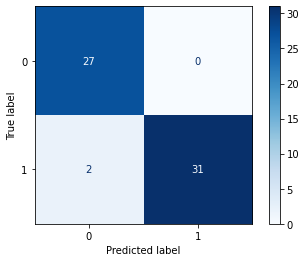

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

View decision boundary

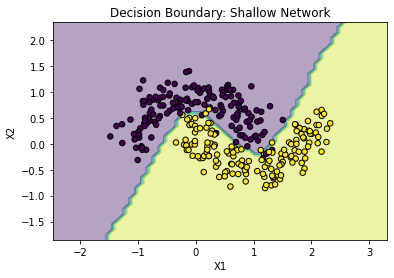

In [19]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, ax = plt.subplots()

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype('int')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, alpha=0.4)
ax.scatter(X[:, 0], X[:, 1], c = y, s=30, edgecolor="k")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_title('Decision Boundary: Shallow Network')
plt.show()

The model object returns a history method:
- history attribute is a dictionary storing:
   - training/validation losses.
   - metrics on train/validation sets.

In [20]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_history = pd.DataFrame(history.history)
train_history.index.name = 'epochs'
train_history.head()
#This is what saving model.fit as history allow us to view.

,loss,accuracy,auc,val_loss,val_accuracy,val_auc
epochs,,,,,,
0,0.760008,0.250000,0.119505,0.751077,0.187500,0.127679
1,0.733983,0.281250,0.144595,0.725842,0.166667,0.180357
2,0.707495,0.380208,0.280353,0.702292,0.458333,0.390179
3,0.683757,0.697917,0.690575,0.680180,0.645833,0.835714
4,0.662118,0.822917,0.906022,0.658732,0.750000,0.922321


Plotting history:

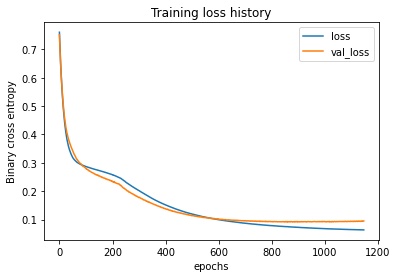

In [21]:
col_list = ['loss', 'val_loss']
train_history[col_list].plot()
plt.ylabel('Binary cross entropy')
plt.title('Training loss history')
plt.show()

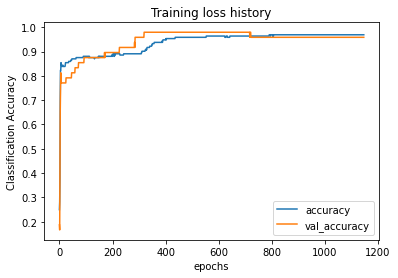

In [22]:
col_list = ['accuracy', 'val_accuracy']
train_history[col_list].plot()
plt.ylabel('Classification Accuracy')
plt.title('Training loss history')
plt.show()

#### Using neural networks to solve some harder problems

#### Image classificaton of hand-written digits

- The MNIST dataset: a classic benchmark for neural network image classification

In [23]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical # for target labels
from tensorflow.keras.layers import Flatten # takes 2D input and turns into 1D array

In [24]:
# load in the data
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


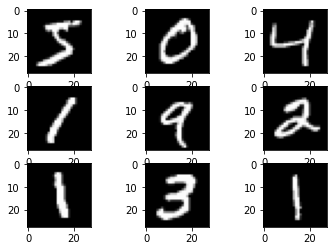

In [25]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
plt.show()

Good practice to normalize/standardize feature inputs:
- makes learning faster (optimization doesn't depend on variable scale)


<img src = "Images/normalize_nn.png" >

Another reason:
- keeping values small helps keeps weights stable

In [26]:
x_train = x_train/255 # normalization
x_test = x_test/255
#When it comes to pictures to normalize we divide the number-1

# Keras requires multi-class labels to be one-hot encoded
y_tr_one_hot = to_categorical(y_train)
y_tt_one_hot = to_categorical(y_test)
y_tt_one_hot

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

#### Sequential model: add another hidden layer

- additional layer will help us learn more complex features
- note: we've added a few more units in first hidden layer as well.

In [27]:
model_images = Sequential()
model_images.add(Flatten(input_shape=(28, 28))) # flattens each 28x28 image into a vector. This is not the first layer
#It is just 
model_images.add(Dense(32, activation='relu'))
model_images.add(Dense(8, activation='relu'))
model_images.add(Dense(10, activation='softmax')) # number of units = number of target classes
#softmax is for multiclassification

In [28]:
model_images.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'] )

Let's train the model.

- Here we will use **validation** loss: stopping to prevent overfitting.

In [29]:
valcallback = EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience = 2)

In [30]:
history_mnist = model_images.fit(x_train, y_tr_one_hot, epochs=100, batch_size= 32, validation_split = 0.2, 
                 callbacks = [trainCallback] )

Epoch 1/100
1500/1500 [==============================] - 1s 515us/step - loss: 0.7056 - accuracy: 0.7763 - val_loss: 0.2900 - val_accuracy: 0.9207
Epoch 2/100
1500/1500 [==============================] - 1s 447us/step - loss: 0.2615 - accuracy: 0.9254 - val_loss: 0.2175 - val_accuracy: 0.9377
Epoch 3/100
1500/1500 [==============================] - 1s 442us/step - loss: 0.2015 - accuracy: 0.9419 - val_loss: 0.2043 - val_accuracy: 0.9383
Epoch 4/100
1500/1500 [==============================] - 1s 448us/step - loss: 0.1702 - accuracy: 0.9513 - val_loss: 0.1622 - val_accuracy: 0.9526
Epoch 5/100
1500/1500 [==============================] - 1s 442us/step - loss: 0.1469 - accuracy: 0.9580 - val_loss: 0.1505 - val_accuracy: 0.9587
Epoch 6/100
1500/1500 [==============================] - 1s 441us/step - loss: 0.1296 - accuracy: 0.9622 - val_loss: 0.1410 - val_accuracy: 0.9607
Epoch 7/100
1500/1500 [==============================] - 1s 443us/step - loss: 0.1163 - accuracy: 0.9666 - val_loss: 0

1500/1500 [==============================] - 1s 451us/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 0.2578 - val_accuracy: 0.9621
Epoch 55/100
1500/1500 [==============================] - 1s 463us/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.2822 - val_accuracy: 0.9585
Epoch 56/100
1500/1500 [==============================] - 1s 452us/step - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.2653 - val_accuracy: 0.9617
Epoch 57/100
1500/1500 [==============================] - 1s 452us/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.2800 - val_accuracy: 0.9578
Epoch 58/100
1500/1500 [==============================] - 1s 458us/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.2697 - val_accuracy: 0.9607
Epoch 59/100
1500/1500 [==============================] - 1s 452us/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.2856 - val_accuracy: 0.9619
Epoch 60/100
1500/1500 [==============================] - 1s 447us/step - loss: 0.0123 - accuracy: 0.9961 - val_loss: 0.2763 

In [31]:
# probability for each class
y_proba = model_images.predict(x_test)
y_proba

array([[3.72582477e-23, 4.83488900e-13, 2.39542469e-10, ...,
        1.00000000e+00, 1.17288923e-14, 1.38524128e-15],
       [3.32099607e-21, 6.53275177e-13, 1.00000000e+00, ...,
        2.15656243e-17, 1.11786824e-15, 1.14122929e-24],
       [8.48105212e-21, 9.99997377e-01, 1.11974828e-06, ...,
        1.75081439e-07, 1.47301171e-06, 5.80345438e-10],
       ...,
       [3.90813875e-35, 3.09654800e-21, 1.27634721e-32, ...,
        2.24705996e-17, 1.82966258e-34, 1.33690869e-14],
       [8.91998453e-21, 4.31069419e-35, 1.84102424e-28, ...,
        1.27878494e-23, 4.97113479e-17, 9.26847340e-17],
       [2.56348016e-27, 7.43862780e-24, 3.80697230e-22, ...,
        2.82940237e-38, 0.00000000e+00, 1.30686811e-26]], dtype=float32)

In [32]:
model_images.evaluate(x_test, y_tt_one_hot, verbose = 0)

[0.31777453422546387, 0.9605000019073486]

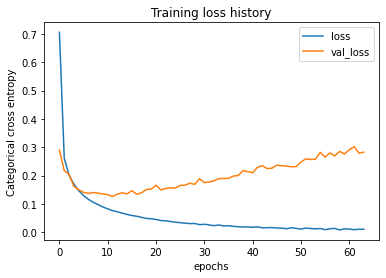

In [33]:
train_mnist_history = pd.DataFrame(history_mnist.history)
train_mnist_history.index.name = 'epochs'

col_list = ['loss', 'val_loss']
train_mnist_history[col_list].plot()
plt.ylabel('Categorical cross entropy')
plt.title('Training loss history')
plt.show()
# This is overfitting. Train loss is better than the validation loss.

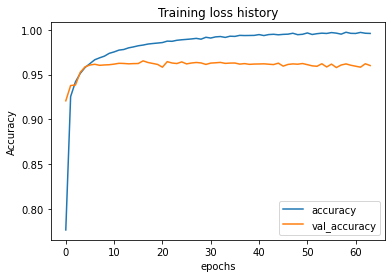

In [34]:
col_list = ['accuracy', 'val_accuracy']
train_mnist_history[col_list].plot()
plt.ylabel('Accuracy')
plt.title('Training loss history')
plt.show()
#This is overfitting. The train accuracy is better than the vaildation accuracy

Clearly, some overfitting.

Getting the class predictions from softmax probabilities.

In [35]:
# argmax axis = -1 gets the column index of maximum probability for each row.
# column index corresponds to digit classes (numbers 0 -9)
predicted = np.argmax(y_proba, axis=-1)
predicted

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

Let's look at our classifier did on the test set in more detail.

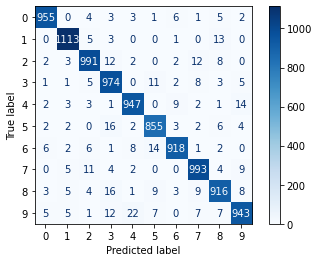

In [36]:
cm_digits = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_digits)

disp.plot(cmap=plt.cm.Blues)
plt.show()

Not bad:
- but in the context of many tasks this is not yet a viable system.
- e.g., reading checks, etc

- Next steps: increasing network complexity / train longer but not overfitting
- getting better fitting and test-set generalization

<center><b>Network Regularization</b></center>